In [275]:
import numpy as np
import pandas as pd
from typing import *
from numpy.typing import NDArray
from typing_extensions import Self

In [276]:
data = pd.read_csv("./spam.csv", encoding="ISO-8859-1")
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [277]:
data = data[["v1", "v2"]].rename(columns={"v1": "label", "v2": "message"})

In [278]:
data["label"] = data["label"].map({"ham": 0, "spam": 1})
data

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [279]:
X = data["message"].to_numpy()
Y = data["label"].to_numpy()

# Реализация Bag of Words и TF-IDF

In [280]:
from collections import Counter
from itertools import filterfalse

class BagOfWords:
    def __init__(self, cutoff: int | float = 1, ngram: int | Iterable[int] = 1, stop_words: Optional[Iterable] = None) -> None:
        if cutoff < 0:
            raise ValueError
        self._cutoff = cutoff
        self._ngram: Iterable[int] = ngram if isinstance(ngram, Iterable) else [ngram]
        self._vocabulary: Optional[NDArray] = None
        self._texts_count: Optional[int] = None
        self._stop_words: set = set() if stop_words is None else set(stop_words)
    
    def _get_words_list(self, input_texts: NDArray) -> list[str]:
        texts = np.empty_like(input_texts, dtype=object)
        for i, text in enumerate(input_texts):
            text = text.lower()
            texts[i]: list[str] = "".join(map(lambda char: char if char.isalnum() else " ", text)).split()
        words_combinations_list = list()
        for text in texts:
            combinations = list()
            for ngram in self._ngram:
                for i in range(len(text) - ngram + 1):
                    combination = list()
                    for u in range(ngram):
                        combination.append(text[i + u])
                    combinations.append(" ".join(combination))
            words_combinations_list.extend(combinations)
        return words_combinations_list
    
    def _check_word_count(self, words_count: int) -> bool:
        if self._cutoff >= 1:
            return words_count < self._cutoff
        return words_count < self._texts_count * self._cutoff
    
    def fit(self, texts: Iterable[str]) -> Self:
        if self._cutoff < 1:
            self._texts_count = len(texts)
        words_list = self._get_words_list(np.array(texts))
        counter = Counter(words_list)
        vocabulary = list()
        for word, _ in filterfalse(lambda x: self._check_word_count(x[1]), counter.items()):
            # if not any([word.find(stop_word) != -1 for stop_word in self._stop_words]):
            if word not in self._stop_words:
                vocabulary.append(word)
        vocabulary.sort()
        self._vocabulary = np.array(vocabulary)
        return self

    def transform(self, texts: Iterable[str]) -> NDArray:
        words_list_per_text = [self._get_words_list(np.array((text,))) for text in texts]
        counters = [Counter(words_list) for words_list in words_list_per_text]
        results = np.zeros((len(texts), self._vocabulary.shape[0]), dtype=int)
        for i, word in enumerate(self._vocabulary):
            for counter, result in zip(counters, results):
                if word in counter.keys():
                    result[i] = counter[word]
        return results

    def fit_transform(self, X: Iterable[str]) -> NDArray:
        self.fit(X)
        return self.transform(X)
    
    @property
    def vocabulary(self) -> NDArray:
        return self._vocabulary

In [281]:
bag_model = BagOfWords(0.01, 2).fit(X[0:50])
bag_model.transform(X[0:50])
print(bag_model.vocabulary)

['000 pounds' '000 prize' '07732584351 rodger' '08000930705 for'
 '08452810075over18 s' '09061701461 claim' '1 50' '1 week' '100 000'
 '100 to' '11 months' '12 hours' '150p day' '16 tsandcs' '2 a' '2 and'
 '2 but' '2 months' '2 spell' '20 000' '20 poboxox36504w45wq' '2005 text'
 '21st may' '2nd may' '3 smth' '3 week' '4 info' '4txt ì¼1' '5 month'
 '50 to' '6days 16' '81010 t' '87077 eg' '87077 try' '87121 to'
 '87575 cost' '9 to' '900 prize' 'a 1' 'a bit' 'a blessing' 'a cuppa'
 'a date' 'a free' 'a great' 'a slice' 'a tea' 'a valued' 'a weak'
 'a wkly' 'about me' 'about this' 'about you' 'actin like' 'aft i'
 'again xuhui' 'ahead with' 'ahhh work' 'aids patent' 'all callers'
 'all i' 'all that' 'all times' 'already then' 'alright no' 'always so'
 'am i' 'am lt' 'amore wat' 'amp we' 'an egg' 'and a' 'and he' 'and how'
 'and i' 'and no' 'and send' 'and she' 'and was' 'and will'
 'anymore tonight' 'anything about' 'anything going' 'anything lor'
 'anything tomo' 'apologetic n' 'apply 084

In [282]:
from typing_extensions import override


class Tfidf(BagOfWords):
    def __init__(self, cutoff: int | float = 1, ngram: int | Iterable[int] = 1, stop_words: Optional[Iterable] = None, sublinear: bool = False) -> None:
        super().__init__(cutoff, ngram, stop_words)
        self._issublinear = sublinear
    
    def _get_tf(self, words_count: int) -> int | float:
        if self._issublinear:
            return 1 + np.log(words_count)
        return words_count
    
    def _get_idf(self, texts_count: int, occurrences: int) -> float:
        return 1 + np.log((texts_count + 1) / (occurrences + 1))
    
    def _minmax_scaler(self, values: NDArray) -> NDArray:
        return (values - np.min(values, axis=0)) / (np.max(values, axis=0) - np.min(values, axis=0))
    
    @override
    def transform(self, texts: Iterable[str]) -> NDArray:
        texts_count = len(texts)
        words_list_per_text = [self._get_words_list(np.array((text,))) for text in texts]
        counters = [Counter(words_list) for words_list in words_list_per_text]
        results = np.zeros((len(texts), self._vocabulary.shape[0]))
        for i, word in enumerate(self._vocabulary):
            occurrences = np.sum([counter[word] > 0 for counter in counters])
            for counter, result in zip(counters, results):
                if word in counter.keys():
                    result[i] = self._get_tf(counter[word]) * self._get_idf(texts_count, occurrences)
        results = self._minmax_scaler(results)
        return results

In [283]:
tfidf_model = Tfidf(0.1, 1).fit(X)
print(*zip(*tfidf_model.transform(X)), sep="\n")

(0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.75, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0, 0.0, 0.5, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.75, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.25, 0.75, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0

# Классификация с понижением размерности

In [284]:
from typing_extensions import Self


class PCA:
    def __init__(self, dimentions: int = 2) -> None:
        self._dimentions = dimentions
        self._projection_matrix: Optional[NDArray] = None
        self._X: Optional[NDArray] = None
    
    def fit(self, X: NDArray) -> Self:
        self._X = X
        covariance = np.cov(X.T)
        eigen_values, eigen_vectors = np.linalg.eig(covariance)
        indices = eigen_values.argsort()[::-1]
        eigen_values, eigen_vectors = eigen_values[indices], eigen_vectors[:, indices]
        self._projection_matrix = eigen_vectors[:, :self._dimentions]
        return self

    def transform(self, X: Optional[NDArray] = None) -> NDArray:
        if X is None:
            X = self._X
        X_transformed = X.dot(self._projection_matrix)
        return X_transformed

In [285]:
from typing_extensions import Self

class KNearestNeighbors():
    def __init__(self, k=1) -> None:
        self.k = k
    
    def fit(self, X_train: np.ndarray, Y_train: np.ndarray) -> Self:
        Y_train = Y_train.reshape(-1, 1)
        self.table: np.ndarray = np.hstack((X_train, Y_train))
        self.classes = set(np.unique(Y_train[:, 0]))
        return self
    
    def _distance(self, x_1: np.ndarray, x_2: np.ndarray) -> np.ndarray:
        return np.linalg.norm(x_1 - x_2, axis=1).reshape(-1, 1)

    def predict(self, X: np.ndarray) -> np.ndarray:
        prediction = np.empty((X.shape[0], 1))
        for i, x_row in enumerate(X):
            distances = self._distance(self.table[:, :-1], x_row)
            neighbors_indexes = distances.argsort(axis=0)[:self.k]
            neighbors_classes = {key: 0 for key in self.classes}
            for j in neighbors_indexes:
                neighbors_classes[self.table[j[0], -1]] += 1
            result: Hashable = max(neighbors_classes.items(), key=lambda x: x[1])[0]
            prediction[i][0] = result
        return prediction

In [286]:
from typing import Iterable, Hashable

class Metrics:
    @staticmethod
    def accuracy(Y_actual: Iterable, prediction: Iterable) -> float:
        matches = 0
        for i in zip(Y_actual, prediction, strict=True):
            if i[0] == i[1]:
                matches += 1
        return matches / len(prediction)
    
    @staticmethod
    def precision(Y_actual: Iterable, prediction: Iterable) -> dict[Hashable, float]:
        unique_values = set(Y_actual).union(set(prediction))
        results = {key: {"True": 0, "False": 0} for key in unique_values}
        for i in zip(Y_actual, prediction, strict=True):
            results[i[1]]["True"] += i[0] == i[1]
            results[i[1]]["False"] += i[0] != i[1]
        for i in results.keys():
            true_positive = results[i]["True"]
            positive = results[i]["True"] + results[i]["False"]
            if positive == 0:
                results[i] = 0.
                continue
            results[i] = round(true_positive / positive, 3)
        return results
    
    @staticmethod
    def recall(Y_actual: Iterable, prediction: Iterable) -> dict[Hashable, float]:
        unique_values = set(Y_actual).union(set(prediction))
        results = {key: {"True positive": 0, "False negative": 0} for key in unique_values}
        for i in zip(Y_actual, prediction, strict=True):
            if i[1] == i[0]:
                results[i[1]]["True positive"] += 1
            else:
                results[i[0]]["False negative"] += 1
        for i in results.keys():
            true_positive = results[i]["True positive"]
            true = results[i]["True positive"] + results[i]["False negative"]
            if true == 0:
                results[i] = 0.
                continue
            results[i] = round(true_positive / true, 3)
        return results

    @classmethod
    def f1_score(cls, Y_actual: Iterable, prediction: Iterable) -> dict[Hashable, float]:
        results = dict()
        precision = cls.precision(Y_actual, prediction)
        recall = cls.recall(Y_actual, prediction)
        for key in precision.keys():
            if precision[key] == 0 or recall[key] == 0:
                results.update({key: 0.})
                continue
            results.update({key: round(2 / (1 / precision[key] + 1 / recall[key]), 3)})
        return results
    
    @classmethod
    def metrics(cls, Y_actual: Iterable, prediction: Iterable) -> dict[Hashable, float]:
        return {"accuracy": cls.accuracy(Y_actual, prediction),
                "precision": cls.precision(Y_actual, prediction),
                "recall": cls.recall(Y_actual, prediction),
                "f1_score": cls.f1_score(Y_actual, prediction)}

In [287]:
import stop_words as sw

stop_words = sw.get_stop_words("english")
stop_words.extend(["i m", "m", "u", "å", "ì", "ìï", "û", "ll", "ve"])

In [288]:
spam_vectorizer = Tfidf(0.006, [1, 2], stop_words, True).fit(X)
spam_vectorized = spam_vectorizer.transform(X)
spam_vectorizer.vocabulary

array(['1', '1 50', '10', '100', '1000', '150p', '150ppm', '16', '18',
       '1st', '2', '3', '4', '5', '50', '500', '6', '7', 'a good',
       'a great', 'a å', 'account', 'ah', 'already', 'also', 'always',
       'amp', 'and i', 'another', 'anything', 'are you', 'around', 'ask',
       'at the', 'awarded', 'b', 'babe', 'back', 'best', 'better', 'big',
       'birthday', 'bit', 'box', 'bt', 'but i', 'buy', 'c', 'call',
       'call later', 'call me', 'camera', 'can', 'can t', 'can you',
       'cant', 'car', 'care', 'cash', 'chance', 'chat', 'check', 'claim',
       'class', 'co', 'co uk', 'com', 'come', 'come to', 'coming',
       'contact', 'cool', 'cos', 'cost', 'cs', 'customer', 'd', 'da',
       'dat', 'day', 'days', 'dear', 'did you', 'didn', 'didn t',
       'dinner', 'do it', 'do u', 'do you', 'don', 'don t', 'done',
       'dont', 'draw', 'dun', 'e', 'eat', 'end', 'enjoy', 'even', 'ever',
       'every', 'feel', 'find', 'find out', 'fine', 'finish', 'first',
       'for a', 

In [289]:
import sklearn.model_selection as skselection

X_train, X_test, Y_train, Y_test = skselection.train_test_split(spam_vectorized, Y, stratify=Y, test_size=0.2, random_state=14)

In [290]:
spam_model = KNearestNeighbors(9).fit(X_train, Y_train)

In [291]:
prediction = spam_model.predict(X_test)
Metrics.metrics(Y_test, prediction.flatten())

{'accuracy': 0.9372197309417041,
 'precision': {0: 0.935, 1: 0.965},
 'recall': {0: 0.997, 1: 0.55},
 'f1_score': {0: 0.965, 1: 0.701}}

In [292]:
X_pca = PCA(2).fit(spam_vectorized).transform()
X_train_pca, X_test_pca, Y_train, Y_test = skselection.train_test_split(X_pca, Y, stratify=Y, test_size=0.2, random_state=14)

In [293]:
pca_spam_model = KNearestNeighbors(9).fit(X_train_pca, Y_train)

In [294]:
pca_prediction = pca_spam_model.predict(PCA(2).fit(X_test_pca).transform())
Metrics.metrics(Y_test, pca_prediction.flatten())

{'accuracy': 0.9739910313901345,
 'precision': {0: 0.982, 1: 0.923},
 'recall': {0: 0.989, 1: 0.879},
 'f1_score': {0: 0.985, 1: 0.9}}

Предсказание

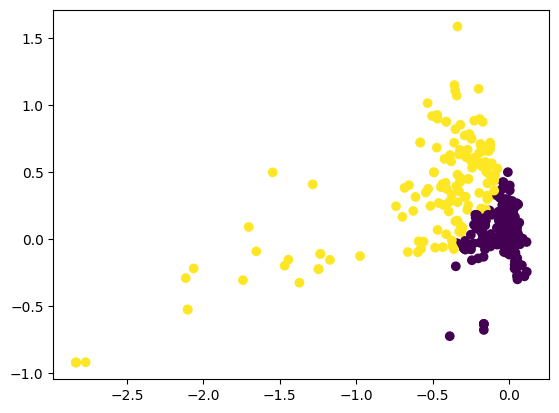

In [295]:
import matplotlib.pyplot as plt

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=pca_prediction)

Настоящая классификация

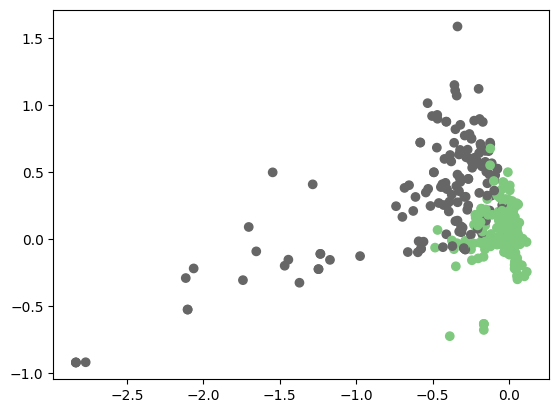

In [296]:
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test, cmap="Accent")

# Мягкая кластеризация с помощью LDA

In [297]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda_model = LDA(2).fit(spam_vectorized)
messages_clusterized = lda_model.transform(spam_vectorized)

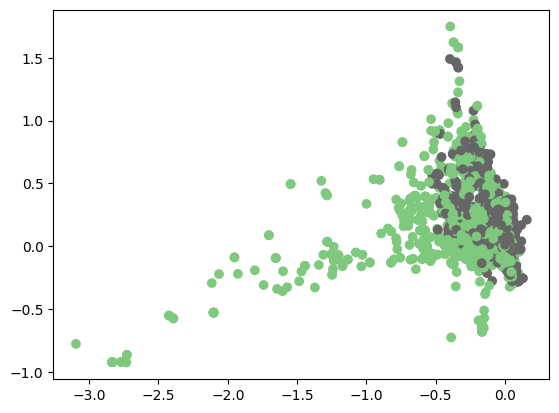

In [298]:
topics: NDArray = np.argmax(messages_clusterized, axis=1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=topics, cmap="Accent");

In [299]:
for i, topic in enumerate(lda_model.components_):
    print(f"{i}: {[spam_vectorizer.vocabulary[u] for u in topic.argsort()[:-11:-1]]}")

0: ['call', 'll', 'get', 's', 'i ll', 't', 'www', 'won', 'later', 'please']
1: ['now', '2', 'take', 'ok', 'go', 'come', 'yes', 'ur', 'going', 'like']
